# Fuga de Clientes

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

## Inicialización

In [176]:
# Importar librerías
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [177]:
warnings.filterwarnings('ignore', category=FutureWarning)

## Carga de datos

In [131]:
# Importar datastes
contracts = pd.read_csv("./files/datasets/input/contract.csv")
internet = pd.read_csv("./files/datasets/input/internet.csv")
personal = pd.read_csv("./files/datasets/input/personal.csv")
phone = pd.read_csv("./files/datasets/input/phone.csv")

## Análisis exploratorio

### contract

In [132]:
# Imprimir datos
contracts

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


In [133]:
# Ver información del dataset
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [134]:
# Verificar número de cliente únicos
contracts['customerID'].nunique()

7043

In [135]:
# Verificar contenido en 'TotalCharges'
contracts['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [136]:
# Ver casos con valores nulos
contracts.query("TotalCharges==' '")

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


In [137]:
# Filtrar contratos sin cobos totales
contract_with_charges = contracts.query("TotalCharges not in' '")
contract_with_charges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   object 
dtypes: float64(1), object(7)
memory usage: 494.4+ KB


In [138]:
# Ver información estadísica de varaible numéricas
contract_with_charges['TotalCharges'] = contract_with_charges['TotalCharges'].astype(float)
contract_with_charges.describe()

C:\Users\ricar\AppData\Local\Temp\ipykernel_18904\1058132662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_with_charges['TotalCharges'] = contract_with_charges['TotalCharges'].astype(float)


,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000
mean,64.798208,2283.300441
std,30.085974,2266.771362
min,18.250000,18.800000
25%,35.587500,401.450000
50%,70.350000,1397.475000
75%,89.862500,3794.737500
max,118.750000,8684.800000


### internet

In [139]:
# Ver sample de data
internet.sample(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5204,4480-MBMLB,Fiber optic,No,Yes,Yes,No,Yes,Yes
1766,7181-BQYBV,Fiber optic,Yes,No,Yes,No,Yes,Yes
435,0621-HJWXJ,Fiber optic,No,Yes,No,No,No,No
3249,6559-ILWKJ,DSL,No,Yes,No,No,Yes,Yes
1393,3902-MIVLE,DSL,Yes,No,Yes,Yes,No,Yes
1256,2720-FVBQP,DSL,No,No,No,No,No,No
4854,6434-TTGJP,DSL,Yes,Yes,Yes,Yes,No,Yes
2733,5569-KGJHX,Fiber optic,No,No,No,No,Yes,No
5508,9767-FFLEM,Fiber optic,No,No,No,No,No,No
2978,9773-PEQBZ,Fiber optic,No,Yes,No,No,No,No


In [140]:
# Ver clientes únicos
internet['customerID'].nunique()

5517

In [141]:
# Ver info de data
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


### personal

In [142]:
# Ver sample de data
personal.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
470,4933-IKULF,Female,1,No,No
95,8637-XJIVR,Female,0,No,No
6268,9746-UGFAC,Female,0,No,No
6749,8469-SNFFH,Male,0,Yes,No
1358,9272-LSVYH,Male,0,No,No
642,0970-ETWGE,Male,0,No,No
191,2472-OVKUP,Male,0,Yes,No
6281,7435-ZNUYY,Male,0,No,No
6050,0487-RPVUM,Male,0,Yes,No
1151,8992-CEUEN,Female,0,No,No


In [143]:
# Ver info de data
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


### phone

In [144]:
# Ver sample de data
phone.sample(10)

,customerID,MultipleLines
2824,2817-LVCPP,No
2055,9554-DFKIC,Yes
3428,5821-MMEIL,No
1717,5832-EXGTT,No
5132,5666-MBJPT,Yes
2082,7180-PISOG,Yes
708,7521-AFHAB,No
4461,3957-LXOLK,Yes
3297,3243-ZHOHY,No
3547,4979-HPRFL,Yes


In [145]:
# Ver info de data
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [146]:
# Verificar si hay clinetes con ambos servicios
phone.merge(internet, how='left')

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
1,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
2,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
3,9305-CDSKC,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
4,1452-KIOVK,Yes,Fiber optic,No,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...
6356,2569-WGERO,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6357,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
6358,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
6359,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


### Pre-preparación de datos

In [147]:
# Unir data frames
df = contracts.merge(phone, how='left')
df = df.merge(internet, how='left')
df = df.merge(personal, how='left')
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,NaN,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No


In [148]:
# Verificar información del dataframe final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   MultipleLines     6361 non-null   object 
 9   InternetService   5517 non-null   object 
 10  OnlineSecurity    5517 non-null   object 
 11  OnlineBackup      5517 non-null   object 
 12  DeviceProtection  5517 non-null   object 
 13  TechSupport       5517 non-null   object 
 14  StreamingTV       5517 non-null   object 
 15  StreamingMovies   5517 non-null   object 
 16  gender            7043 non-null   object 


Al unir los datasets, las columnas respectivas a los ervicios (phone y internet), contienen valores nulos debido a que hay clientes que sol tiene uno de estos servicios. Reemplazaremos estos valores nulo con la palabra "non-contracted" para identificar estos casos.

In [149]:
# Reemplazar valores nulos
df.fillna("non-contracted", inplace=True)
df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,non-contracted,DSL,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Fiber optic,No,No,No,No,No,No,Male,1,Yes,No


Ahora cambiaremos los nombres de la columnas usando un función que aplica el método "snake"

In [150]:
# Crear función para cambiar nombres de columnas
def to_snake_case(name):
    name = name.replace(' ', '_')
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Renombrar columnas usando la función to_snake_case
df.columns = [to_snake_case(col) for col in df.columns]

In [151]:
# Verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  gender             7043 

Ahora en el acaso de la columna "total_charges", el cual contiene registros sin valores numéricos, serán reemplazdo con np.nan para después convertir la columna en tipo float. Estos casos se deben a que todabía no se ha cumplido el periodo del contrato de paga.

In [152]:
# Reemplazar valores vacios con nan
df['total_charges'].replace(" ", np.nan, inplace=True)
df['total_charges'] = df['total_charges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7032 non-null   float64
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  gender             7043 

In [153]:
# Agregar columna churn
df['churn'] = df['end_date'].apply(lambda x: 'Yes' if x != 'No' else 'No')

In [154]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,non-contracted,DSL,...,Yes,No,No,No,No,Female,0,Yes,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,No,DSL,...,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,...,Yes,No,No,No,No,Male,0,No,No,Yes
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,non-contracted,DSL,...,No,Yes,Yes,No,No,Male,0,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,...,No,No,No,No,No,Female,0,No,No,Yes


## Análisis de datos

Ahora que tenemos nuestro dataset pre-procesado, comenzaremos a analizar las variables a través de gráficos de histogramas y boxplots, separaremos nuestro análisis en varaibles numéricas y categóricas. También veremos la evolución de los contratos de los servicios.

In [155]:
# Estableceer columna numéricas y categóricas
numeric_columns = ['monthly_charges' ,'total_charges']
categorical_columns = list(set(df.columns) - set(numeric_columns) - set(['customer_id', 'begin_date', 'end_date']))

### Análisis variables numéricas

monthly_charges:
Median: 70.35
Mean: 70.35

total_charges:
Median: 1397.475
Mean: 1397.475



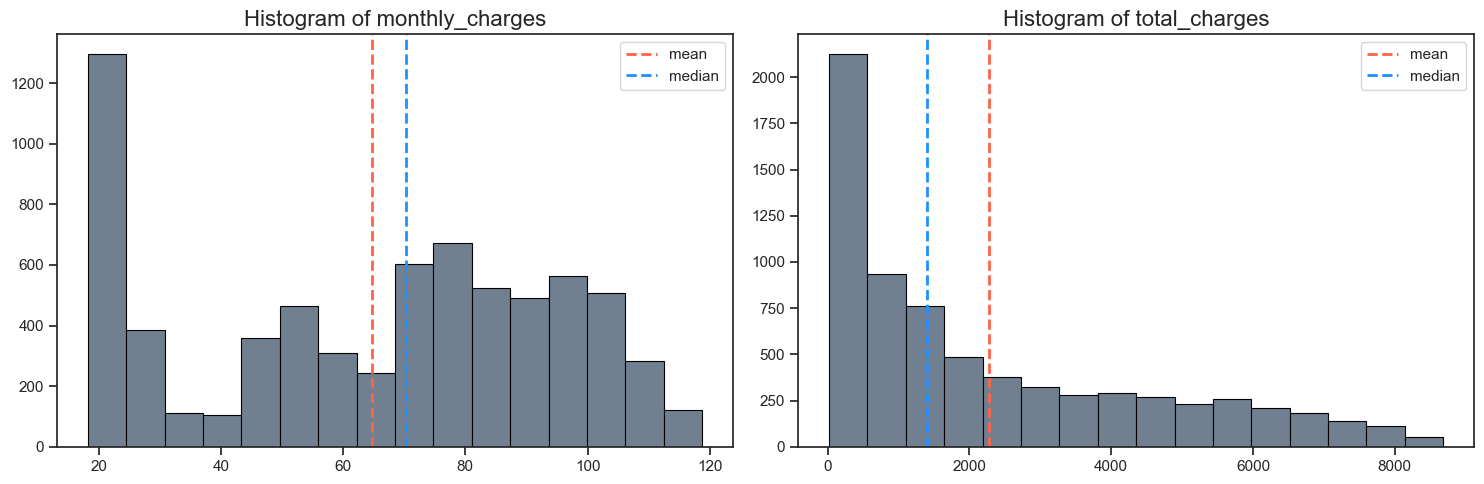

In [156]:
# Graficar histogramas por columna
sns.set(style="ticks")

num_vars = len(numeric_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2 

# Crear sub gráficos
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5)) 

# Aplanar el arreglo de ejes para que podamos iterar sobre él fácilmente
axes = axes.flatten()

# Iterar por cada columna numérica y crear histograma
for i, col in enumerate(numeric_columns):
    axes[i].hist(df[col], bins=16, color='slategray', edgecolor="black", linewidth=0.8)
    
    # Dibujar líneas para media y mediana
    mean_val = df[col].mean()
    median_val = df[col].median()
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)

    print(f'{col}:')
    print(f'Median: {median_val}')
    print(f'Mean: {median_val}')
    print()
    
    # Anadir leyenda
    axes[i].legend([mean_line, median_line], ['mean', 'median'])
    axes[i].set_title(f'Histogram of {col}', fontsize=16)
    
# Remover sub gráficos no usados
if len(numeric_columns) % 2:
    for j in range(i+1, num_rows*2):
        fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

c:\Users\ricar\Escritorio\GitHub\final_project\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ricar\Escritorio\GitHub\final_project\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


monthly_charges:
Median: 70.35
Mean: 64.76169246059918

total_charges:
Median: 1397.475
Mean: 2283.3004408418656



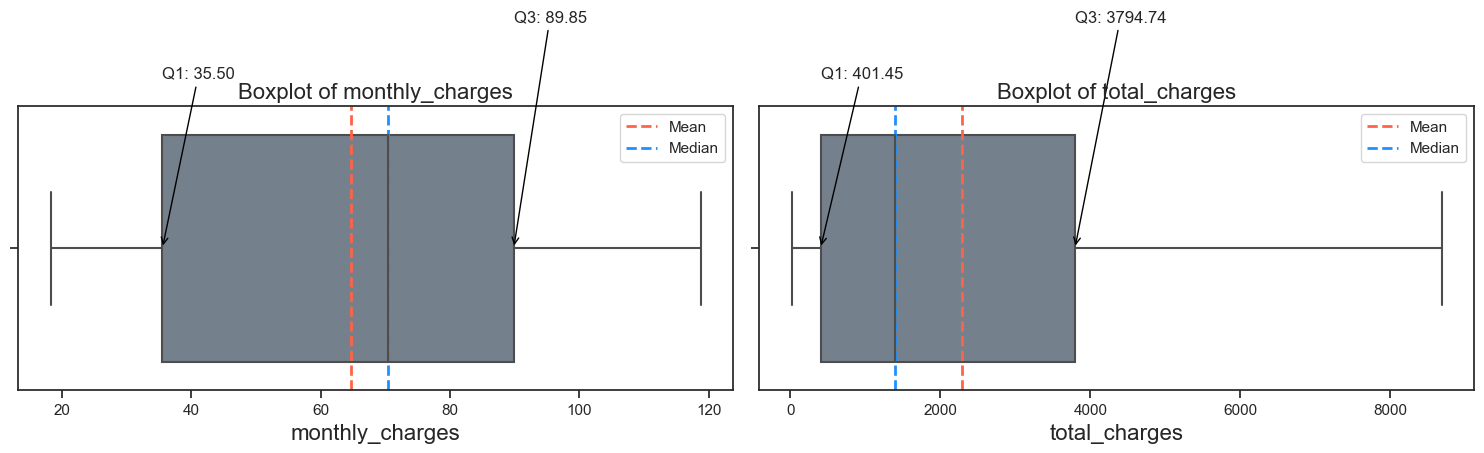

In [157]:
# Graficar boxplots por columna
sns.set(style="ticks")

num_vars = len(numeric_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], color='slategray', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=20, weight='bold')
    axes[i].set_xlabel(col, fontsize=16)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    q1_val = df[col].quantile(0.25)
    q3_val = df[col].quantile(0.75)
    
    mean_line = axes[i].axvline(mean_val, color='tomato', linestyle='dashed', linewidth=2)
    median_line = axes[i].axvline(median_val, color='dodgerblue', linestyle='dashed', linewidth=2)
    
    # Annotate the lines
    axes[i].annotate(f'Q1: {q1_val:.2f}', xy=(q1_val, 0), xytext=(q1_val, -0.6),
                     textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'), fontsize=12)
    axes[i].annotate(f'Q3: {q3_val:.2f}', xy=(q3_val, 0), xytext=(q3_val, -0.8),
                     textcoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'), fontsize=12)
    
    print(f'{col}:')
    print(f'Median: {median_val}')
    print(f'Mean: {mean_val}')
    print()
    
    axes[i].legend([mean_line, median_line], ['Mean', 'Median'])
    axes[i].set_title(f'Boxplot of {col}', fontsize=16)

plt.tight_layout()
plt.show()

Analizando nuestros histogramas, podemos extraer las siguientes primeras conlusiones importantes:

- **monthly_charges**: muestra un sesgo hacia la izquierda, donde la mayoría de las cargas mensuales se concentran entre los $35 y $90 aproximadamente. No se muestran valores atípicos.


- **total_charges**: muestra un sesgo hacia la derecha, donde la mayoría de las cargas totales se concentran entre los $400 y $3,800 aproximadamente. No se muestran valores atípicos.

Como hemos podido verificar, tanto los cargos mensuales como totales muestran sesgos en su distribución. Sin embargo, no parecen mostrar valores atípicos que deban preocuparnos.

### Análisis variables categóricas

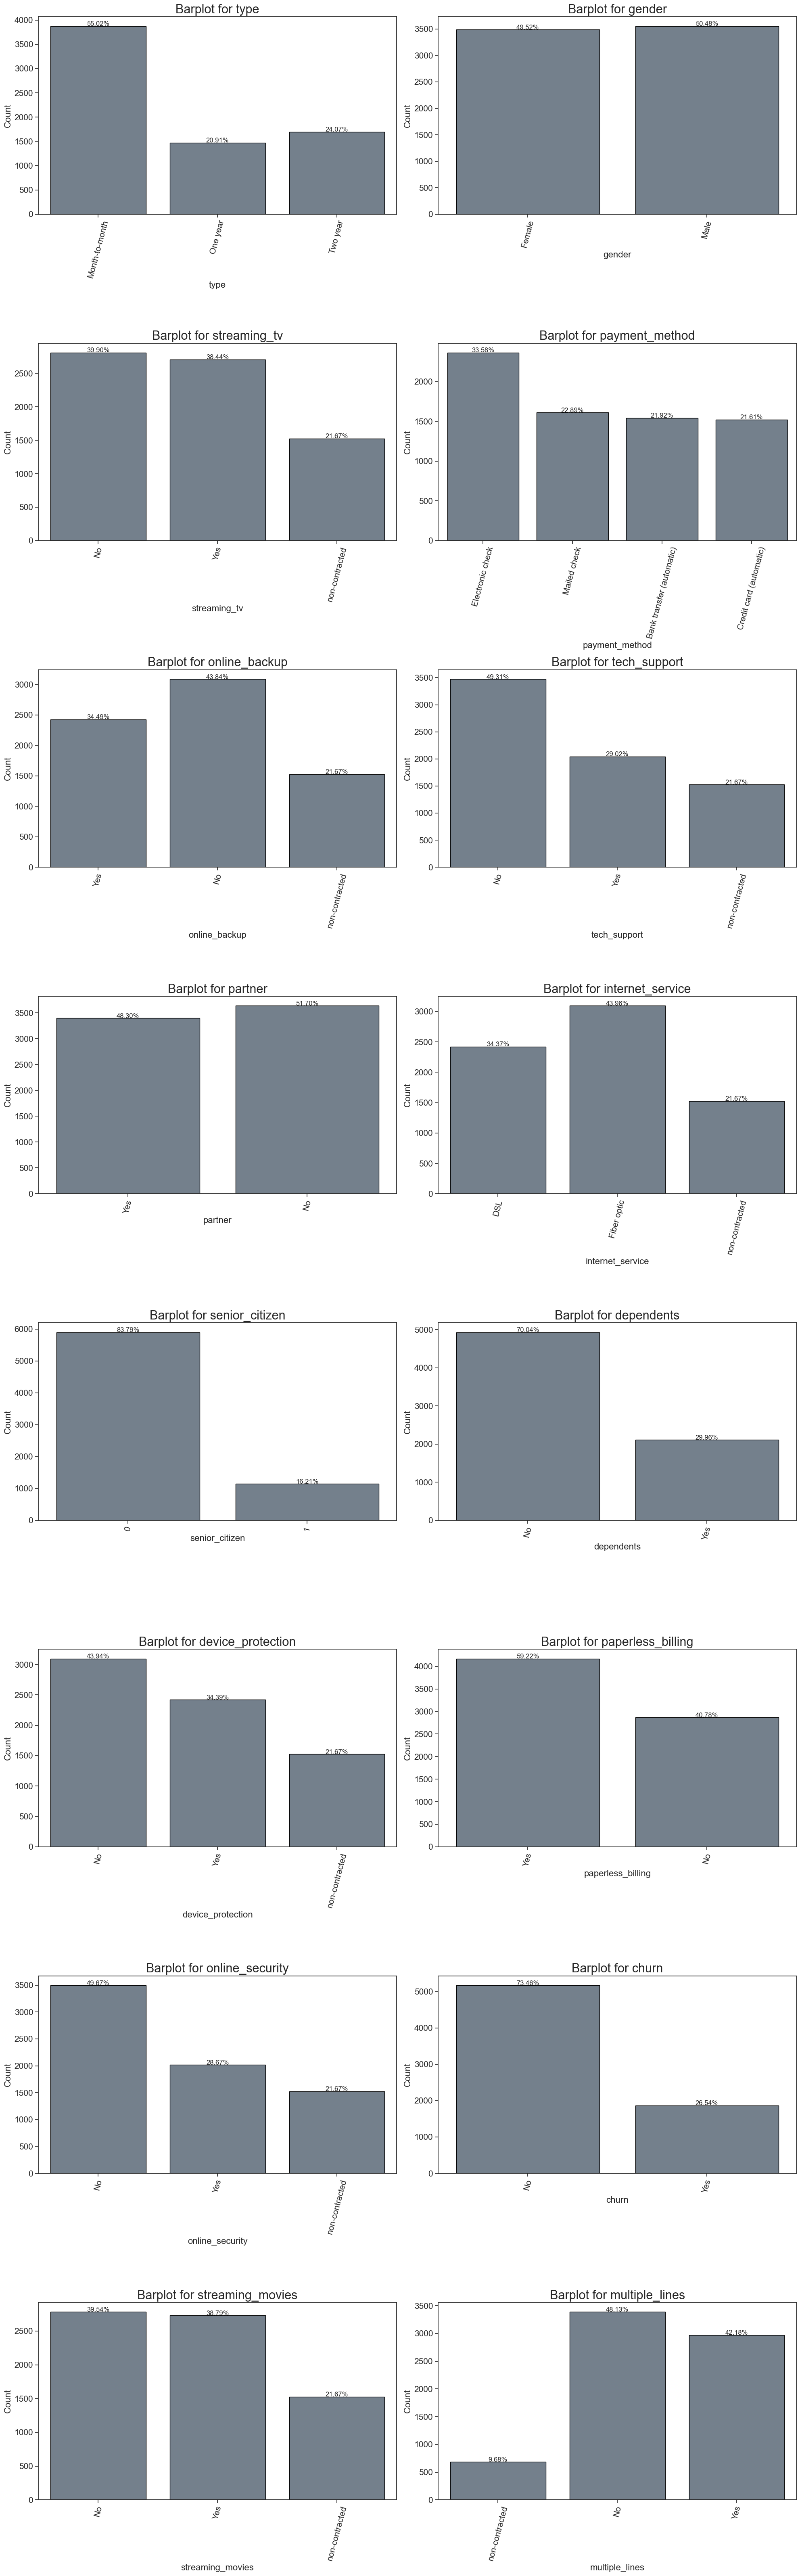

In [181]:
# Establecer el estilo de seaborn
sns.set(style="ticks")

# Determinar el número de filas necesarias para nuestros subgráficos
num_vars = len(categorical_columns)
num_rows = num_vars // 2
num_rows += num_vars % 2

# Crear los subgráficos
fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows*8))

# Aplanar el arreglo de ejes para que podamos iterar sobre él fácilmente
axes = axes.flatten()

# Iterar por cada columna
for i, column in enumerate(categorical_columns):
    total = len(df[column])  # Total number of data points for each column
    column_order = df[column].value_counts().nlargest(15).index
    ax = sns.countplot(x=column, data=df, order=column_order, ax=axes[i], color="slategray", edgecolor='black')

    for p in ax.patches:
        height = p.get_height()  # Get the height of the bar
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.2f}'.format((height / total) * 100) + '%',  # Calculate and format percentage
                ha="center",
                fontsize=12)

    axes[i].set_title(f'Barplot for {column}', fontsize=22)
    axes[i].set_xlabel(column, fontsize=16)
    axes[i].set_ylabel('Count', fontsize=16)
    axes[i].tick_params(axis='x', rotation=75, labelsize=15)
    axes[i].tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

En el caso de las columnas categóricas, podemos concluir lo siguiente:

- **churn**: el 26.54% de clientes han dado de baja el servico frente a los 74.46% que siguen siendo clientes.

- **type**: el tipo de plan más popular es "month-to-month" (+50%), "two-year" (24.07%) y "one-year" (20.91%) siguen respectivamente con poca diferencia entre ellos.

- **payment_method**: La opción más popular de medio de pago es cheque eléctrónico (33.58%), lo demás medios de pago presentan una concentración similar de clientes (20% aproximadamente) donde la tarjeta de crédito es el medio de pago menos usado (21.61%).

- **paperless_billing**: la mayoría de contratos son de cargos sin uso de papel (59.22%).

- **gender**: la distribución entre clientes hombres y muejeres es casi igual, los hombres son ligeremente superior en cantidad.

- **dependents**: la mayoría de los clientes no tienen dependendientes (70.04%).

- **partner**: la distribución entre cliente con parejas (48.30%) y sin parajes es muy similar (51.70%), los que no tienen parejas son de mayor cantidad.

- **senior_citizen**: la gran parte de los clientes no son seniors (83.79%), es decir personas de la tercera edad (16.21%).

- **multiple_lines**: la mayoría de clientes que tiene el servicio de telefonía fija no son de múltiples líneas (48.13%) comparado con lo que si (42.18%).

- **streaming_tv**: la cantida de personas que adquiere y no adquiere el servicio de streming es muy similar, 38.44% vs 39.90%.

- **online_backup**: la mayoría de clientes no contratan el servicio de soporte online (43.84%) frente a lo que si (34.49%).

- **tech_support**: al igual que el soporte online, el soporte técnico tampoco es tan adquirido (49.31%), incluso es menos adquirido que el online.

- **internet_service**: la fibra óptica es el tipo de servicio de internte más contratado (43.96%), frente a los de DSL (34.37%).

- **device_protection**: este servicio tampoco es mu popular entre los clientes (43.94%).

- **online_security**: la mayoría de clinetes no contrata el servicio de seguridad online (49.67%).

- **streaming_movies**: la proporción entre los que no contratn y contratan el servidcio de streming de películas es casi igual (39.54% vs 21.67%).


In [172]:
df['streaming_movies'].value_counts(normalize=True)

streaming_movies
No                0.395428
Yes               0.387903
non-contracted    0.216669
Name: proportion, dtype: float64

## Preguntas

1. ¿A qué se refiere la columnas PaperlessBilling en el dataset contract? Algunos casos de mailcheck cuentan con valor "YES" y "NO". ¿Qué significan estos casos?, ¿Son errores?.
2. ¿Los contratos son por producto o servicio total?, algunos clientes tienen ambos productos, pero solo un contrato.
3. En el caso del producto de internet, esta se puede configurar a través de una línea telefónica. ¿Esta línea puede ser de otro proveedor?
4. ¿El tipo de configuración de internet tiene algún efecto en la calidad del mismo? Por ejemplo: fibra óptica.
5. Actualmente, utilizar un medio de pago físico (papel) puede generar un cobro adicional ¿Ocurre en este caso?
6. ¿Hay algún beneifico entre eligir un plan de largo plazo en vez de uno de corto plazo?

## Plan de trabajo

1. Incialización
Describiremos el proyecto, establceremos los objetivos del mismo y haremos un pequeño resumen del contenido de nuestros datasets.
2. Cargar de datos
3. Análisis exploratorio
Realizaremos un análisis de nuestra data, veremos tanto si nuestros datos cuantan con valores atípicos, ausentes, duplicados o algún otro problema que creamos que debamos investigar más a fondo.
4. Análisis de datos
Haremos un análisis profundo de nuestras variables donde veremos la distribución de las mismas, relación entre ellas y otros aspectos necesarios para determinar el comportamiento de las mismas y, con ello, ver si es necesario hacer una modificación en alguna de ellas más adelante.
5. Preparación de datos
Prepararemos nuestros datos según las conclusiones de nuestro análisis previo. El objetivo de esta etapa es obtener nuestro dataset listo para poder utilizarlo en nuestros modelos, esto incluye tratamiento de ausentes y valores atpipicos, creación de nuevas variables, modificación de tipos de datos, adición de nuevas variables, entre otros relacionados.
6. Creación y evaluación de modelos
Crearemos distintos modelos, identificaremos los mejores hiperparámetros para cada uno, los entrenaremos con nuestro dataset y los evaluaremos. Estableceremos los resultados e identificaremos el mejor modelo.
7. Conclusión
Finalmente, haremos un resumen de los pasos realizados en el proyecto, insghts importantes encontrados y la conclusión acerca de nuestros modelos.